In [1]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

# Helper function to split our data
from sklearn.model_selection import train_test_split

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, f1_score

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier 

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Import the trees from sklearn
from sklearn import tree

# Helper functions to visualize our trees
from sklearn.tree import plot_tree, export_text

#tree regression
from sklearn.ensemble import RandomForestRegressor

# imbalanced-learn library
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [2]:
df = pd.read_csv('../dataset/selected_dataset_cleaned.csv')
df.head()

,type,price,beds,bath,propertysqft,street_name,latitude,longitude,zip_code,city
0,condo for sale,50000000,6,6.0,6569.000000,manhattan,40.726633,-74.008832,10013,new york
1,condo for sale,40000000,5,6.0,7488.000000,manhattan,40.715351,-74.012844,10007,new york
2,co-op for sale,169000,1,1.0,2184.207862,astoria,40.775923,-73.908733,11105,astoria
3,co-op for sale,199000,1,1.0,2184.207862,astoria,40.777200,-73.907370,11105,astoria
4,co-op for sale,225000,1,1.0,2184.207862,astoria,40.775357,-73.908548,11105,astoria


In [3]:
df.dtypes

type             object
price             int64
beds              int64
bath            float64
propertysqft    float64
street_name      object
latitude        float64
longitude       float64
zip_code          int64
city             object
dtype: object

In [4]:
# we will not use street_name & city because they are confusing
# doing get dummies for type column
df = pd.get_dummies(df, columns=['type'])
df.head()

,price,beds,bath,propertysqft,street_name,latitude,longitude,zip_code,city,type_co-op for sale,type_condo for sale,type_contingent,type_house for sale,type_multi-family home for sale,type_pending,type_townhouse for sale
0,50000000,6,6.0,6569.000000,manhattan,40.726633,-74.008832,10013,new york,0,1,0,0,0,0,0
1,40000000,5,6.0,7488.000000,manhattan,40.715351,-74.012844,10007,new york,0,1,0,0,0,0,0
2,169000,1,1.0,2184.207862,astoria,40.775923,-73.908733,11105,astoria,1,0,0,0,0,0,0
3,199000,1,1.0,2184.207862,astoria,40.777200,-73.907370,11105,astoria,1,0,0,0,0,0,0
4,225000,1,1.0,2184.207862,astoria,40.775357,-73.908548,11105,astoria,1,0,0,0,0,0,0


In [5]:
df.dtypes

price                                int64
beds                                 int64
bath                               float64
propertysqft                       float64
street_name                         object
latitude                           float64
longitude                          float64
zip_code                             int64
city                                object
type_co-op for sale                  uint8
type_condo for sale                  uint8
type_contingent                      uint8
type_house for sale                  uint8
type_multi-family home for sale      uint8
type_pending                         uint8
type_townhouse for sale              uint8
dtype: object

In [6]:
df.duplicated().sum()

0

In [7]:
df_work = df.drop(columns= ['type_contingent', 'type_pending', 'type_multi-family home for sale', 'type_house for sale', 'street_name', 'city'])
df_work.head()

,price,beds,bath,propertysqft,latitude,longitude,zip_code,type_co-op for sale,type_condo for sale,type_townhouse for sale
0,50000000,6,6.0,6569.000000,40.726633,-74.008832,10013,0,1,0
1,40000000,5,6.0,7488.000000,40.715351,-74.012844,10007,0,1,0
2,169000,1,1.0,2184.207862,40.775923,-73.908733,11105,1,0,0
3,199000,1,1.0,2184.207862,40.777200,-73.907370,11105,1,0,0
4,225000,1,1.0,2184.207862,40.775357,-73.908548,11105,1,0,0


In [8]:
X = df_work.drop(columns= 'price')
X.head()

,beds,bath,propertysqft,latitude,longitude,zip_code,type_co-op for sale,type_condo for sale,type_townhouse for sale
0,6,6.0,6569.000000,40.726633,-74.008832,10013,0,1,0
1,5,6.0,7488.000000,40.715351,-74.012844,10007,0,1,0
2,1,1.0,2184.207862,40.775923,-73.908733,11105,1,0,0
3,1,1.0,2184.207862,40.777200,-73.907370,11105,1,0,0
4,1,1.0,2184.207862,40.775357,-73.908548,11105,1,0,0


In [9]:
y = df_work['price']
y.head()

0    50000000
1    40000000
2      169000
3      199000
4      225000
Name: price, dtype: int64

In [25]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 
X_train.shape, X_test.shape

((3240, 9), (1081, 9))

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)  
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)  

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_resampled, y_resampled)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_

y_pred = np.round(best_model.predict(X_test)) 

mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
print("Mean Squared Error: %f" % mse)

r2 = r2_score(y_true=y_test, y_pred=y_pred)
print("R-squared Score: %f" % r2)


feature_importance = pd.Series(best_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

!pip install catboost

# GradientBoostRegressor

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor

# Split the data into training and testing sets
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 


        # # Hyperparameter tuning using GridSearchCV
        # param_grid = {
        #     'n_estimators': [50, 100, 200],
        #     'max_depth': [None, 10, 20],
        #     'min_samples_split': [2, 5, 10],
        #     'min_samples_leaf': [1, 2, 4]
        # }

        # grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5)


        # grid_search.fit(X_train, y_train)

        # best_params = grid_search.best_params_
        # print("Best Hyperparameters:", best_params)

        # # Use the best model
        # gb_model = grid_search.best_estimator_

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42) # comment

        
# Fit the model to the training data
gb_model.fit(X_train, y_train)  # commment

# y_pred = np.round(gb_model.predict(X_test))
y_pred = np.round(gb_model.predict(X_test))

# Now let's evaluate our model on the test set
y_pred = np.round(gb_model.predict(X_test))


mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mse)  # Calculate RMSE
print(f'Root Mean Squared Error: {rmse}')

median_price = y_test.median()
print(f'Median Price: {median_price}')

if rmse < median_price:
    print("RMSE is less than Median Price")
else:
    print("RMSE is greater than or equal to Median Price")
    
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

r2 = r2_score(y_true=y_test, y_pred=y_pred)
print("R-squared Score: %f" % r2)

# Calculating adjusted R-squared
n = len(y_test)
k = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print("Adjusted R-squared Score: %f" % adjusted_r2)

Mean Squared Error: 7322723957075.557
Root Mean Squared Error: 2706053.206623173
Median Price: 800000.0
RMSE is greater than or equal to Median Price
Mean Absolute Error: 847058.7631822387
R-squared Score: 0.688204
Adjusted R-squared Score: 0.685584


In [27]:
feature_importance = pd.Series(gb_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

propertysqft               0.411262
zip_code                   0.204669
bath                       0.111831
beds                       0.096278
type_condo for sale        0.055125
longitude                  0.051853
latitude                   0.038980
type_co-op for sale        0.024612
type_townhouse for sale    0.005389
dtype: float64


In [28]:
# Calculate residuals
residuals = y_test - y_pred

# Add residuals to the DataFrame for further analysis if needed
df_residuals = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residuals': residuals})

# Display the DataFrame with residuals
# print(df_residuals)

df_residuals.head(50)

,Actual,Predicted,Residuals
1073,438000,210903.0,227097.0
856,479000,242332.0,236668.0
1222,1750000,1181863.0,568137.0
3406,439900,218376.0,221524.0
2250,660400,1616092.0,-955692.0
3559,365000,939174.0,-574174.0
17,31000000,10398919.0,20601081.0
1653,545000,889124.0,-344124.0
1391,175000,210903.0,-35903.0
2083,795000,1168340.0,-373340.0


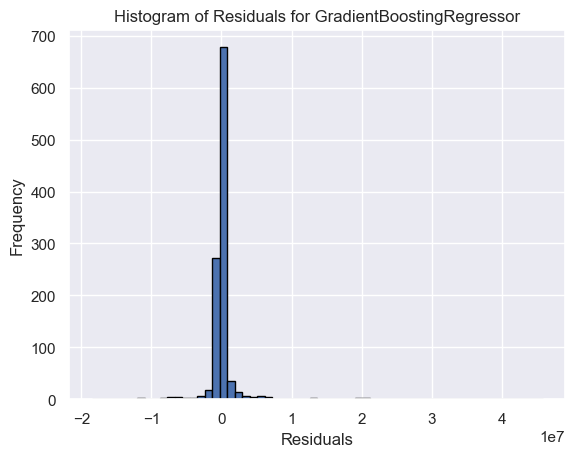

Average of Residuals: 106405.84366327475
Average of Absolute Residuals: 847058.7631822387


In [29]:

# Plot histogram of residuals
plt.hist(residuals, bins=60, edgecolor='black')
plt.title('Histogram of Residuals for GradientBoostingRegressor')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Calculate and print the average of residuals
average_residuals = residuals.mean()
print(f'Average of Residuals: {average_residuals}')


# Calculate absolute residuals
absolute_residuals = np.abs(residuals)

# Calculate and print the average of absolute residuals
average_absolute_residuals = absolute_residuals.mean()
print(f'Average of Absolute Residuals: {average_absolute_residuals}')

# Random Forest Regressor

In [34]:

# Split the data into training and testing sets
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
rp_model = RandomForestRegressor()

# Fit the model to the training data
rp_model.fit(X_train, y_train)

y_pred = np.round(rp_model.predict(X_test))


mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mse)  # Calculate RMSE
print(f'Root Mean Squared Error: {rmse}')

median_price = y_test.median()
print(f'Median Price: {median_price}')

if rmse < average_days_staying:
    print("RMSE is less than Median Price")
else:
    print("RMSE is greater than or equal to Median Price")
    
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

r2 = r2_score(y_true=y_test, y_pred=y_pred)
print("R-squared Score: %f" % r2)

# Calculating adjusted R-squared
n = len(y_test)
k = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print("Adjusted R-squared Score: %f" % adjusted_r2)

Mean Squared Error: 7714168656175.083
Root Mean Squared Error: 2777439.226369334
Median Price: 800000.0
RMSE is greater than or equal to Median Price
Mean Absolute Error: 811218.3339500462
R-squared Score: 0.671537
Adjusted R-squared Score: 0.668777


In [35]:
feature_importance = pd.Series(rp_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

propertysqft               0.382083
zip_code                   0.211470
bath                       0.115436
longitude                  0.086245
latitude                   0.084313
beds                       0.059765
type_condo for sale        0.035924
type_co-op for sale        0.015224
type_townhouse for sale    0.009539
dtype: float64


In [36]:
# Calculate residuals
residuals = y_test - y_pred

# Add residuals to the DataFrame for further analysis if needed
df_residuals = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residuals': residuals})

# Display the DataFrame with residuals
# print(df_residuals)

df_residuals.head(50)

,Actual,Predicted,Residuals
1073,438000,286016.0,151984.0
856,479000,381940.0,97060.0
1222,1750000,1604225.0,145775.0
3406,439900,388386.0,51514.0
2250,660400,1199750.0,-539350.0
3559,365000,622973.0,-257973.0
17,31000000,10811640.0,20188360.0
1653,545000,729712.0,-184712.0
1391,175000,183279.0,-8279.0
2083,795000,910982.0,-115982.0


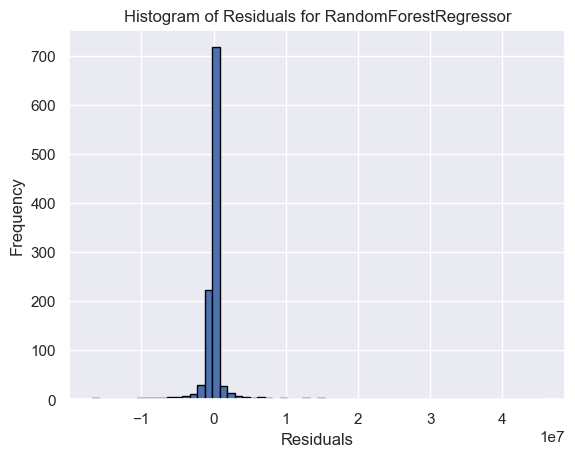

Average of Residuals: 65917.24051803886
Average of Absolute Residuals: 811218.3339500462


In [37]:

# Plot histogram of residuals
plt.hist(residuals, bins=60, edgecolor='black')
plt.title('Histogram of Residuals for RandomForestRegressor')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Calculate and print the average of residuals
average_residuals = residuals.mean()
print(f'Average of Residuals: {average_residuals}')


# Calculate absolute residuals
absolute_residuals = np.abs(residuals)

# Calculate and print the average of absolute residuals
average_absolute_residuals = absolute_residuals.mean()
print(f'Average of Absolute Residuals: {average_absolute_residuals}')